
# Import Python libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Import Datasets

In [2]:
train = pd.read_csv("Training Data.csv")
test = pd.read_csv("Test Data.csv")  

In [3]:
train_zero = train[train['risk_flag'] == 0]
train_ones = train[train['risk_flag'] == 1]

print(train_zero.shape)
print(train_ones.shape)

train_data = pd.concat([train_zero.sample(221004),train_ones.sample(30996)])

(221004, 13)
(30996, 13)


# Check how train dataset looks like.

In [4]:
train.head()

,Id,income,age,experience,married,house_ownership,car_ownership,profession,city,state,current_job_years,current_house_years,risk_flag
0,1,1303835,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [5]:
train_data.shape

(252000, 13)

In [6]:
test.head()


,id,income,age,experience,married,house_ownership,car_ownership,profession,city,state,current_job_years,current_house_years
0,1,7393090,59,19,single,rented,no,Geologist,Malda,West Bengal,4,13
1,2,1215004,25,5,single,rented,no,Firefighter,Jalna,Maharashtra,5,10
2,3,8901342,50,12,single,rented,no,Lawyer,Thane,Maharashtra,9,14
3,4,1944421,49,9,married,rented,yes,Analyst,Latur,Maharashtra,3,12
4,5,13429,25,18,single,rented,yes,Comedian,Berhampore,West Bengal,13,11


In [7]:
test.shape

(28000, 12)

# Convert datatype of selected fields.

In [8]:
def convert_data(data):
    data = data.drop(columns=['Id'],axis=1)
#     data = data.drop(columns=['state'],axis=1)
    data = data.drop(columns=['city'],axis=1)
#     data = data.drop(columns=['profession'],axis=1)
    data["profession"],unique_profession =pd.factorize(data.profession)
#     data["city"],unique_city=pd.factorize(data.city)
    data["state"],unique_state=pd.factorize(data.state)
    data["married"],unique_married=pd.factorize(data.married)
    data["house_ownership"],unique_house_ownership =pd.factorize(data.house_ownership)
    print(unique_house_ownership)
    data["car_ownership"],unique_car_ownership=pd.factorize(data.car_ownership)
    return data#,unique_profession,unique_city,unique_state

In [9]:
# train_data,train_profession,train_city,train_state = convert_data(train_data)
train_data = convert_data(train_data)

Index(['rented', 'owned', 'norent_noown'], dtype='object')


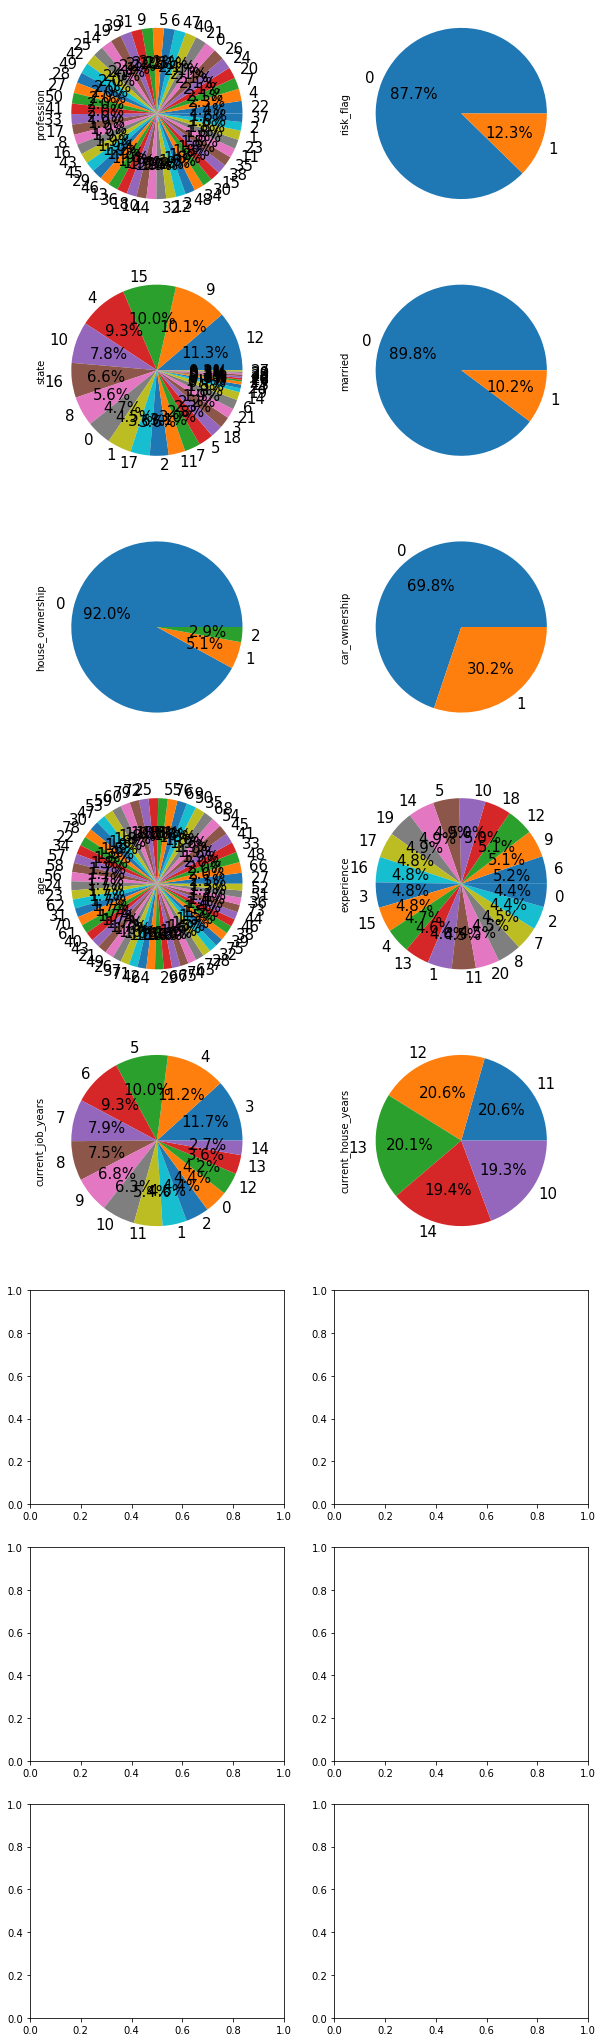

In [10]:
def srt_dist(df,cols):
    fig, axes = plt.subplots(8, 2,squeeze=True)
    axes = axes.flatten()
    for i, j in zip(cols, axes):
        (df[i].value_counts()*100.0 /len(df)).plot.pie(autopct='%.1f%%',figsize =(10,37), fontsize =15,ax=j )                                                                      
srt_dist(train_data,["profession",'risk_flag','state','married','house_ownership','car_ownership','age','experience','current_job_years','current_house_years'])
# srt_dist(y_train,y_train.columns)

In [11]:
# print(train_data)
# print(train_profession)
# print(train_city)

In [12]:
test = test.rename(columns={"id": "Id"})
# test_data,test_profession,test_city,test_state = convert_data(test_data)
test_data = convert_data(test)

Index(['rented', 'owned', 'norent_noown'], dtype='object')


In [13]:
# print(test_data)
# print(test_profession)
# print(test_city)

# Drop the dependent variable from the train dataset. 

In [14]:
xtrain=train_data.drop("risk_flag",axis=1)
ytrain=train_data["risk_flag"]

In [15]:
print(ytrain.shape)
print(ytrain.isin([0]).sum())

(252000,)
221004


In [16]:
X_train, X_val, y_train, y_val = train_test_split(xtrain, ytrain, test_size=0.1, random_state=42)

# Train your model

## SVC

In [ ]:
from sklearn import svm
model = svm.SVC()
model.fit(X_train, y_train)

#Predicction
y_pred_train = model.predict(X_train)
y_pred_train = (y_pred_train > 0.5)
print(y_pred_train)

#Making the confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train,y_pred_train)
print(cm)

#Accuracy 
print(accuracy_score(y_train,y_pred_train))


## ANN

In [ ]:
#feature scaling 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler(with_mean=False)
X_train = sc.fit_transform(X_train)
X_val  = sc.transform(X_val)
test_data  = sc.transform(test_data)

In [ ]:
### Keras and Implementation of ANN
import tensorflow as tf
from tensorflow import keras
# from keras.models import Sequential #to initialize the NN
# from keras.layers import  Dense #to generate the layers
# from keras import dropout


In [ ]:
# example of a model defined with the sequential api
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Dropout

#Parameter Tuning 
#Evaluation of ANN by k fold cross validaion
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

# def build_classifier(optimizer):
#     '''
#     LOCAL CLASSIFIER
#     for cross validation K times going to call this function 
#     and it will return 
#     '''
#     # define the model
#     model = Sequential()

#     #First hidden layer
#     #sigmoid for output layer 
#     #Rectifier for Hidden layer
#     model.add(Dense(kernel_initializer="uniform", activation="relu", input_dim=11, units=8))

#     #how many nodes? No rules but (avg of number nodes input and output layer) #input+output/2  =(11+1)/2 = 6
#     #init  = initilizatin of values

#     #second hidden layer 
#     model.add(Dropout(0.1)) #to avoid overfitting #start with low value if ovefitting doesn't reduce do ovefitting
#     model.add(Dense(units=10, activation="relu", kernel_initializer="uniform")) #netwrok knows how to connect so need of input_dim

#     #second hidden layer 
#     model.add(Dropout(0.1)) #to avoid overfitting #start with low value if ovefitting doesn't reduce do ovefitting
#     model.add(Dense(units=7, activation="relu", kernel_initializer="uniform")) #netwrok knows how to connect so need of input_dim

#     #second hidden layer 
#     model.add(Dropout(0.1)) #to avoid overfitting #start with low value if ovefitting doesn't reduce do ovefitting
#     model.add(Dense(units=4, activation="relu", kernel_initializer="uniform")) #netwrok knows how to connect so need of input_dim


#     #Add final-output layer
#     model.add(Dropout(0.1))  #to avoid overfitting
#     model.add(Dense(units=1, activation="sigmoid", kernel_initializer="uniform")) #netwrok knows how to connect so need of input_dim

#     #compile the ANN
#     model.compile(optimizer =optimizer, loss ='binary_crossentropy',metrics = ['accuracy'])
#     #adam is stochastic gradient method
   
#     return model

# model = KerasClassifier(build_fn=build_classifier)

# parameters = {'batch_size' :[100,200,500],
#               'nb_epoch' : [10,20,50],
#               'optimizer' : ['adam','rmsprop']}

# #created object
# grid_search = GridSearchCV(estimator = model,
#                            param_grid = parameters,
#                            scoring = 'accuracy',
#                            cv = 2) 

# #fitting object
# grid_search = grid_search.fit(X_train,y_train)
# best_parameter =  grid_search.best_params_
# best_accuracy  =  grid_search.best_score_
        
# print(best_parameter)

# print(best_accuracy)



In [ ]:
# define the model
model = Sequential()

#First hidden layer
#sigmoid for output layer 
#Rectifier for Hidden layer
model.add(Dense(kernel_initializer="uniform", activation="relu", input_dim=8, units=20))

#how many nodes? No rules but (avg of number nodes input and output layer) #input+output/2  =(11+1)/2 = 6
#init  = initilizatin of values

#second hidden layer 
# model.add(Dropout(0.1)) #to avoid overfitting #start with low value if ovefitting doesn't reduce do ovefitting
# model.add(Dense(units=50, activation="relu", kernel_initializer="uniform")) #netwrok knows how to connect so need of input_dim

# #third hidden layer 
# model.add(Dropout(0.1)) #to avoid overfitting #start with low value if ovefitting doesn't reduce do ovefitting
# model.add(Dense(units=30, activation="relu", kernel_initializer="uniform")) #netwrok knows how to connect so need of input_dim

#fourth hidden layer 
model.add(Dropout(0.1)) #to avoid overfitting #start with low value if ovefitting doesn't reduce do ovefitting
model.add(Dense(units=10, activation="relu", kernel_initializer="uniform")) #netwrok knows how to connect so need of input_dim

#fifth hidden layer 
model.add(Dropout(0.1)) #to avoid overfitting #start with low value if ovefitting doesn't reduce do ovefitting
model.add(Dense(units=5, activation="relu", kernel_initializer="uniform")) #netwrok knows how to connect so need of input_dim

#Add final-output layer
model.add(Dropout(0.1))  #to avoid overfitting
model.add(Dense(units=1, activation="sigmoid", kernel_initializer="uniform")) #netwrok knows how to connect so need of input_dim

#compile the ANN
model.compile(optimizer='adam', loss ='binary_crossentropy',metrics = ['accuracy'])
#adam is stochastic gradient method
    
#Fit model to training set
model.fit(X_train,y_train,batch_size =1000,epochs =200)
# 3. Update weights 
# 4. num of epochs                

In [ ]:
#Predicction
y_pred_train = model.predict(X_train)
y_pred_train = (y_pred_train > 0.5)
print(y_pred_train)

#Making the confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train,y_pred_train)
print(cm)

#Accuracy 
print(accuracy_score(y_train,y_pred_train))

In [ ]:
#Predicction
y_pred_val = model.predict(X_val)
y_pred_val = (y_pred_val > 0.5)

#Making the confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_val,y_pred_val)
print(cm)

#Accuracy 
print(accuracy_score(y_val, y_pred_val))

# Predict on test_data set

In [ ]:
y_pred= model.predict(test_data)

In [ ]:
y_pred = (y_pred > 0.5)
res = pd.DataFrame([])
res["id"] = test["Id"].copy()
res["risk_flag"] = y_pred.astype(int)

In [ ]:
res #result
res.to_csv('result.csv',index=False)

In [ ]:
res_zero = res[res['risk_flag'] == 0]
res_ones = res[res['risk_flag'] == 1]
print(res_zero.shape)
print(res_ones.shape)